# Laboratorio de regresión - 2

|                |   |
:----------------|---|
| Francisco Josué Ramírez Avila    |   |
| 31/08/2025    |   |
| 747819|   |

## Regresión polinomial

Observa la siguiente gráfica.

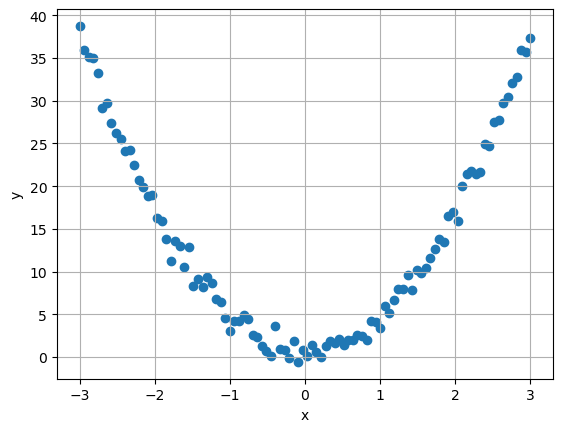

In [1]:
import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100); y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()

Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
X = x.reshape(-1, 1)   
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [3]:
lr.intercept_

13.30223225795873

In [4]:
lr.coef_

array([-0.04955448])

Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.

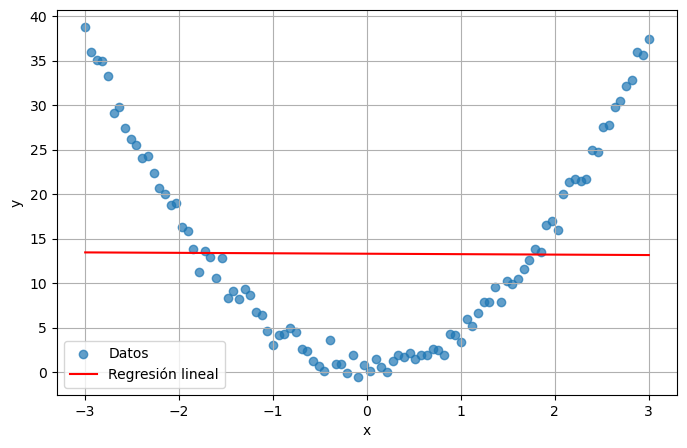

In [5]:
import matplotlib.pyplot as plt

y_pred = lr.predict(X)

plt.figure(figsize=(8,5))
plt.scatter(x, y, label="Datos", alpha=0.7)
plt.plot(x, y_pred, color="red", label="Regresión lineal")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.

In [6]:
X_2 = np.hstack([
    X, 
    X**2
])
lr = LinearRegression()
lr.fit(X_2,y)

LinearRegression()

In [7]:
lr.intercept_

0.6194209631804917

In [8]:
lr.coef_

array([-0.04955448,  4.14388884])

In [9]:
from sklearn.metrics import r2_score
Y_ = lr.predict(X_2)
r2_1orden = r2_score (y,Y_)
r2_1orden

0.9934118040713642

Crea una gráfica con las observaciones y la nueva curva que ajustaste.

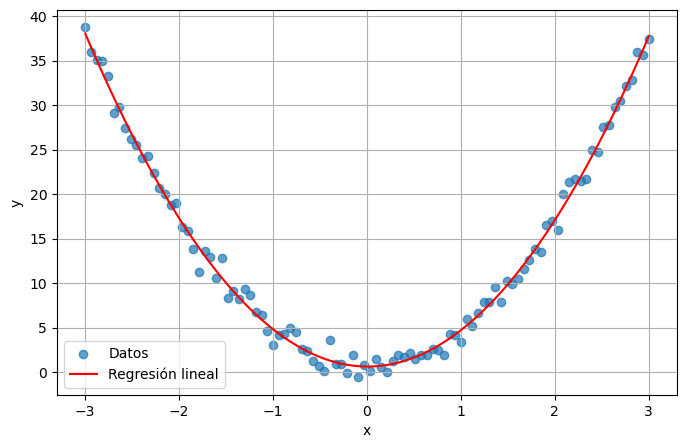

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, label="Datos", alpha=0.7)
plt.plot(x, Y_, color="red", label="Regresión lineal")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

### Predicción x=5

In [11]:

b0 = lr.intercept_
b1, b2 = lr.coef_

y_x5 = b0 + b1*5 + b2*(5**2)
y_x5

103.96886954819944

Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$.

## 3 Orden

In [12]:
X_3 = np.hstack([
    X, 
    X**2, 
    X**3
])
lr = LinearRegression()
lr.fit(X_3,y)

LinearRegression()

In [13]:
from sklearn.metrics import r2_score
Y_3 = lr.predict(X_3)
r2_3orden = r2_score (y,Y_3)
r2_3orden

0.9934129585186598

In [14]:
lr.intercept_

0.6194209631804899

In [15]:
lr.coef_

array([-6.55753967e-02,  4.14388884e+00,  2.90847549e-03])

In [16]:
b0 = lr.intercept_
b1, b2, b3 = lr.coef_

y_x5 = b0 + b1*5 + b2*(5**2) + b3*(5**3)
y_x5

104.25232438790744

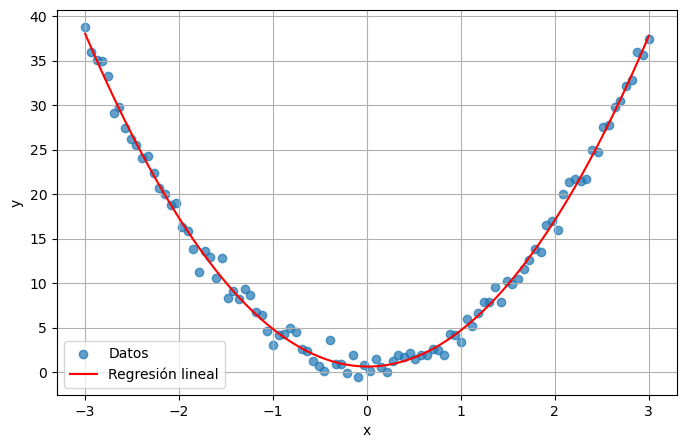

In [17]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, label="Datos", alpha=0.7)
plt.plot(x, Y_3, color="red", label="Regresión lineal")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

## 5 Orden

In [18]:
X_5 = np.hstack([
    X, 
    X**2, 
    X**3,
    X**4,
    X**5
])
lr = LinearRegression()
lr.fit(X_5,y)

LinearRegression()

In [19]:
from sklearn.metrics import r2_score
Y_5 = lr.predict(X_5)
r2_5orden = r2_score (y,Y_5)
r2_5orden

0.9934954953676421

In [20]:
lr.intercept_

0.633711647828278

In [21]:
b0 = lr.intercept_
b1, b2, b3, b4, b5 = lr.coef_

y_x5 = b0 + b1*5 + b2*(5**2) + b3*(5**3) + b4*(5**4) + b5*(5**5)
y_x5


84.59895012673377

In [22]:
lr.coef_

array([-2.76393644e-01,  4.12831746e+00,  1.10135698e-01,  1.97920171e-03,
       -1.05167018e-02])

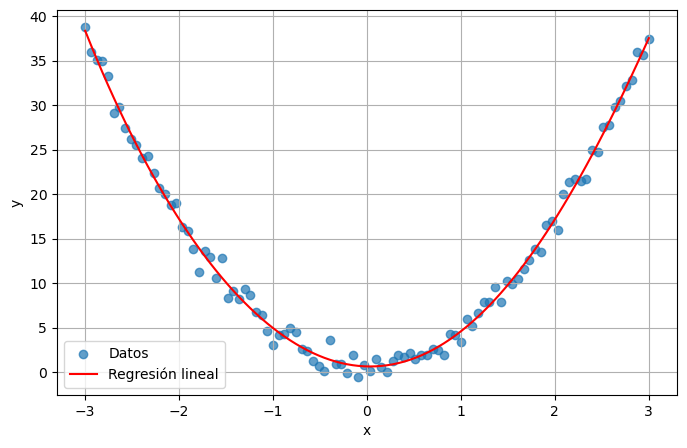

In [23]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, label="Datos", alpha=0.7)
plt.plot(x, Y_5, color="red", label="Regresión lineal")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

## 7 Orden

In [24]:
X_7 = np.hstack([
    X, 
    X**2, 
    X**3,
    X**4,
    X**5,
    X**6,
    X**7
])
lr = LinearRegression()
lr.fit(X_7,y)

LinearRegression()

In [25]:
from sklearn.metrics import r2_score
Y_7 = lr.predict(X_7)
r2_7orden = r2_score (y,Y_7)
r2_7orden

0.9935089341876935

In [26]:
lr.intercept_

0.6101810919962016

In [27]:
lr.coef_

array([-1.75155617e-01,  4.18219958e+00,  1.07431886e-02, -1.56446593e-02,
        1.33331414e-02,  1.40889740e-03, -1.61012799e-03])

In [28]:
b0 = lr.intercept_
b1, b2, b3, b4, b5, b6, b7 = lr.coef_

y_x5 = (b0 
        + b1*5 
        + b2*(5**2) 
        + b3*(5**3) 
        + b4*(5**4) 
        + b5*(5**5) 
        + b6*(5**6) 
        + b7*(5**7))
y_x5

33.743218476140214

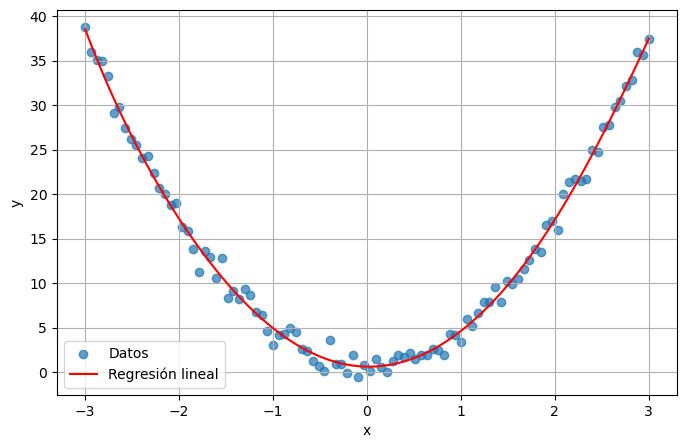

In [29]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, label="Datos", alpha=0.7)
plt.plot(x, Y_7, color="red", label="Regresión lineal")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

## 9 Orden

In [30]:
X_9 = np.hstack([
    X, 
    X**2, 
    X**3,
    X**4,
    X**5,
    X**6,
    X**7,
    X**8,
    X**9
])
lr = LinearRegression()
lr.fit(X_9,y)

LinearRegression()

In [31]:
from sklearn.metrics import r2_score
Y_9 = lr.predict(X_9)
r2_9orden = r2_score (y,Y_9)
r2_9orden 

0.9935141799662259

In [32]:
lr.intercept_

0.5890185996496591

In [33]:
lr.coef_

array([-1.10778098e-01,  4.26535653e+00, -9.23732104e-02, -6.55597796e-02,
        5.72464222e-02,  1.08500851e-02, -8.45937252e-03, -5.51840642e-04,
        3.53081565e-04])

In [34]:
b0 = lr.intercept_
b1, b2, b3, b4, b5, b6, b7, b8, b9 = lr.coef_

y_x5 = (b0 
        + b1*5 
        + b2*(5**2) 
        + b3*(5**3) 
        + b4*(5**4) 
        + b5*(5**5) 
        + b6*(5**6) 
        + b7*(5**7) 
        + b8*(5**8) 
        + b9*(5**9))
y_x5

215.73637926208443

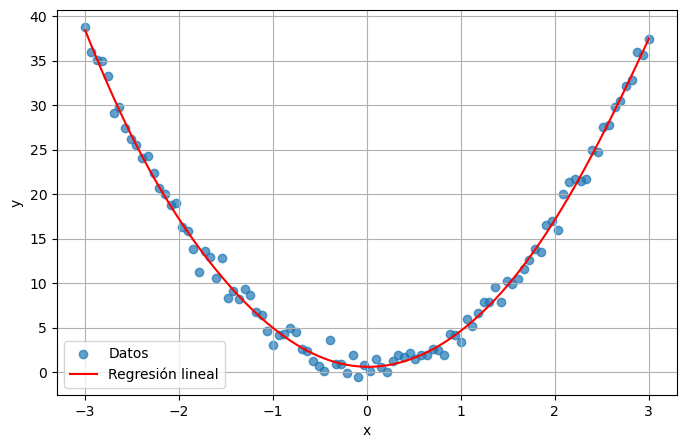

In [35]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, label="Datos", alpha=0.7)
plt.plot(x, Y_9, color="red", label="Regresión lineal")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

## 11 Orden

In [36]:
X_11 = np.hstack([
    X, 
    X**2, 
    X**3,
    X**4,
    X**5,
    X**6,
    X**7,
    X**8,
    X**9,
    X**10,
    X**11
])
lr = LinearRegression()
lr.fit(X_11,y)

LinearRegression()

In [37]:
from sklearn.metrics import r2_score
Y_11 = lr.predict(X_11)
r2_11orden = r2_score (y,Y_11)
r2_11orden

0.9935338704150221

In [38]:
lr.intercept_

0.5670839644956676

In [39]:
lr.coef_

array([ 9.00703987e-02,  4.39720527e+00, -5.68294874e-01, -1.90428125e-01,
        3.69496567e-01,  5.17798355e-02, -9.13700221e-02, -5.98142327e-03,
        9.92036867e-03,  2.50411792e-04, -3.99285153e-04])

In [40]:
b0 = lr.intercept_
b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11 = lr.coef_

y_x5 = (b0 
        + b1*5 
        + b2*(5**2) 
        + b3*(5**3) 
        + b4*(5**4) 
        + b5*(5**5) 
        + b6*(5**6) 
        + b7*(5**7) 
        + b8*(5**8) 
        + b9*(5**9) 
        + b10*(5**10) 
        + b11*(5**11))
y_x5

-5265.34425353856

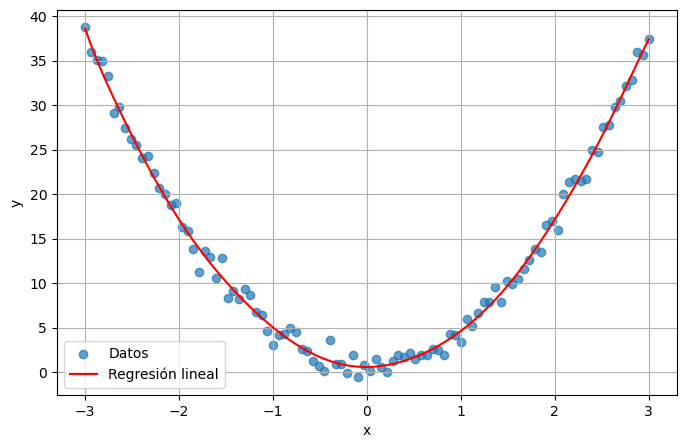

In [41]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, label="Datos", alpha=0.7)
plt.plot(x, Y_11, color="red", label="Regresión lineal")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

**¿Cuál modelo consideras que es mejor? ¿Por qué?**

Si nos basamos en el r2 nos podemos dar cuenta que mientras mas grados tenemos es un poco mas pequeño el error, por lo que tomariamos el de grado 11

Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).

¿Cuál modelo crees que sea mejor?

La calcule previamente y viendo los valores obtenidos podemos concluir que las 2 que mas se ajustan son las de 2 y 3 orden, por lo que esos son los mejores

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3